In [ ]:
import numpy as np
from scipy import stats
import pandas as pd 
from google.colab import files
import io
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving ionosphere_data.csv to ionosphere_data (2).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ionosphere_data.csv']))

In [ ]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
df.feature2.sum()

0

In [ ]:
df=df.drop(columns='feature2')

In [ ]:
df.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from keras.regularizers import l2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
y[y =='g'] = 1

In [ ]:
y[y =='b'] = 0

In [ ]:
y = y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
model= Sequential([
    Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 200)               6800      
_________________________________________________________________
dense_65 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 51        
Total params: 32,001
Trainable params: 32,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import keras
from keras.callbacks import EarlyStopping
# optimizer = keras.optimizers.Adam(lr=0.05)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=50)
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
loss_train=[]
loss_val=[]
acc_train=[]
acc_val=[]
for train_index, test_index in kf.split(x):
  X_train,X_test,y_train,y_test=x[train_index],x[test_index],y[train_index],y[test_index]
  history=model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)
  loss_train.append(history.history['loss'])
  loss_val.append(history.history['val_loss'])
  acc_train.append(history.history['accuracy'])
  acc_val.append(history.history['val_accuracy'])

Epoch 1/100
2/2 [==============================] - 0s 91ms/step - loss: 0.0055 - accuracy: 0.9957 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 3.2300e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.3662e-04 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 5.1650e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0080 - accuracy: 0.9957 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0072 - accuracy: 0.9957 - val_loss: 0.0144 - val_accuracy: 0.9796
Epoch 8/

In [ ]:
results = model.evaluate(X_train, y_train, batch_size=128)
print("train loss, train acc:", results)

2/2 [==============================] - 0s 5ms/step - loss: 4.7923e-05 - accuracy: 1.0000
train loss, train acc: [4.7922992962412536e-05, 1.0]


In [ ]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 15ms/step - loss: 9.9443e-06 - accuracy: 1.0000
test loss, test acc: [9.944264093064703e-06, 1.0]


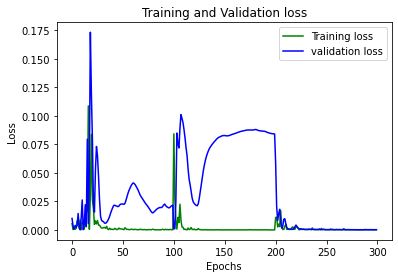

In [ ]:
loss_train=np.array(loss_train)
loss_train = loss_train.flatten()
loss_val=np.array(loss_val)
loss_val=loss_val.flatten()
epochs = range(0,300)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

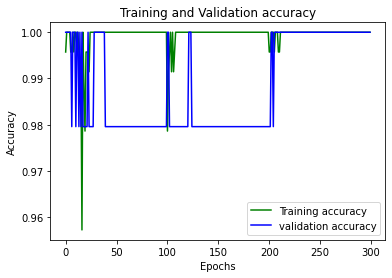

In [ ]:
acc_train=np.array(acc_train)
acc_train = acc_train.flatten()
acc_val=np.array(acc_val)
acc_val=acc_val.flatten()
epochs = range(0,300)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()